In [ ]:
import gdown
import zipfile
import os
# Google Drive file ID
file_id = '1pjvirJVjCFmKh-dKKdc5lzYNOlTfve-5'
# Download the file using gdown
download_url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'downloaded_file.zip'
gdown.download(download_url, output_file, quiet=False)

# Unzipping the downloaded file
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# Optionally, remove the zip file after extraction
os.remove(output_file)

print("File downloaded and extracted successfully.")

Downloading...
From (original): https://drive.google.com/uc?id=1pjvirJVjCFmKh-dKKdc5lzYNOlTfve-5
From (redirected): https://drive.google.com/uc?id=1pjvirJVjCFmKh-dKKdc5lzYNOlTfve-5&confirm=t&uuid=0130d2f2-2820-4193-bfbb-5448e7a1c035
To: /content/downloaded_file.zip
100%|██████████| 458M/458M [00:06<00:00, 69.6MB/s]


File downloaded and extracted successfully.


In [ ]:
!pip install torch torchvision
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.9/index.html
!pip install pycocotools

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.9/index.html


In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-sg8lsrwy
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-sg8lsrwy
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done


In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

# Register datasets
register_coco_instances("train_dataset", {}, "/content/extracted_files/Dataset/train/annotations/instances_default.json", "/content/extracted_files/Dataset/train/images")
register_coco_instances("valid_dataset", {},"/content/extracted_files/Dataset/valid/annotations/instances_default.json", "/content/extracted_files/Dataset/valid/images")
register_coco_instances("test_dataset", {}, "/content/extracted_files/Dataset/test/annotations/instances_default.json", "/content/extracted_files/Dataset/test/images")

# Configuration setup
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("valid_dataset",)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 3000  # Set based on your dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5

# Train the model
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[10/06 14:16:58 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[10/06 14:16:58 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/06 14:17:14 d2.utils.events]:  eta: 0:30:08  iter: 19  total_loss: 3.876  loss_cls: 1.724  loss_box_reg: 0.8153  loss_mask: 0.692  loss_rpn_cls: 0.5597  loss_rpn_loc: 0.06934    time: 0.7028  last_time: 0.5550  data_time: 0.1181  last_data_time: 0.0145   lr: 4.9953e-06  max_mem: 2669M
[10/06 14:17:34 d2.utils.events]:  eta: 0:30:38  iter: 39  total_loss: 3.664  loss_cls: 1.64  loss_box_reg: 0.8373  loss_mask: 0.6883  loss_rpn_cls: 0.4364  loss_rpn_loc: 0.07306    time: 0.6738  last_time: 0.4068  data_time: 0.0406  last_data_time: 0.0088   lr: 9.9902e-06  max_mem: 2669M
[10/06 14:17:45 d2.utils.events]:  eta: 0:29:38  iter: 59  total_loss: 3.431  loss_cls: 1.45  loss_box_reg: 0.8628  loss_mask: 0.6828  loss_rpn_cls: 0.3762  loss_rpn_loc: 0.06273    time: 0.6361  last_time: 0.5998  data_time: 0.0126  last_data_time: 0.0059   lr: 1.4985e-05  max_mem: 2669M
[10/06 14:17:59 d2.utils.events]:  eta: 0:29:02  iter: 79  total_loss: 3.142  loss_cls: 1.264  loss_box_reg: 0.851  loss_mask: 0.6

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("test_dataset", cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "test_dataset")
inference_on_dataset(trainer.model, test_loader, evaluator)


WARNING [10/06 14:46:23 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/06 14:46:23 d2.data.datasets.coco]: Loaded 2 images in COCO format from /content/extracted_files/Dataset/test/annotations/instances_default.json
[10/06 14:46:23 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    car     | 2            |   wheel    | 4            |   lights   | 5            |
|   window   | 8            |            |              |            |              |
|   total    | 19           |            |              |            |              |
[10/06 14:46:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='

OrderedDict([('bbox',
              {'AP': 83.01677667766776,
               'AP50': 96.12211221122112,
               'AP75': 96.12211221122112,
               'APs': nan,
               'APm': 84.85148514851485,
               'APl': 83.36044318717586,
               'AP-car': 95.04950495049505,
               'AP-wheel': 90.0,
               'AP-lights': 79.70297029702971,
               'AP-window': 67.31463146314634}),
             ('segm',
              {'AP': 81.84488448844884,
               'AP50': 96.12211221122112,
               'AP75': 93.8118811881188,
               'APs': nan,
               'APm': 82.54950495049505,
               'APl': 83.23432343234323,
               'AP-car': 100.0,
               'AP-wheel': 90.64356435643565,
               'AP-lights': 75.0990099009901,
               'AP-window': 61.63696369636964})])

WARNING [10/06 14:46:29 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/06 14:46:29 d2.data.datasets.coco]: Loaded 2 images in COCO format from /content/extracted_files/Dataset/test/annotations/instances_default.json
[10/06 14:46:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/06 14:46:29 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/06 14:46:29 d2.data.common]: Serializing 2 elements to byte tensors and concatenating them all ...
[10/06 14:46:29 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/06 14:46:29 d2.evaluation.evaluator]: Start inference on 2 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/06 14:46:30 d2.evaluation.evaluator]: Total inference time: 0:00:00.746605 (0.746605 s / iter per device, on 1 devices)
[10/06 14:46:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.171377 s / iter per device, on 1 devices)
[10/06 14:46:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/06 14:46:30 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/06 14:46:30 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[10/06 14:46:30 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[10/06 14:46:30 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[10/06 14:46:31 d2.evaluation.fast_eval_api]: Accumulating evaluation results...
[10/06 14:46:31 d2.evaluation.fast_eval_api]: COCOeval_opt.accumulate() finished in 0.03 seconds.
 Average Precision  (AP)

OrderedDict([('bbox',
              {'AP': 83.01677667766776,
               'AP50': 96.12211221122112,
               'AP75': 96.12211221122112,
               'APs': nan,
               'APm': 84.85148514851485,
               'APl': 83.36044318717586,
               'AP-car': 95.04950495049505,
               'AP-wheel': 90.0,
               'AP-lights': 79.70297029702971,
               'AP-window': 67.31463146314634}),
             ('segm',
              {'AP': 81.84488448844884,
               'AP50': 96.12211221122112,
               'AP75': 93.8118811881188,
               'APs': nan,
               'APm': 82.54950495049505,
               'APl': 83.23432343234323,
               'AP-car': 100.0,
               'AP-wheel': 90.64356435643565,
               'AP-lights': 75.0990099009901,
               'AP-window': 61.63696369636964})])

[10/06 15:00:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


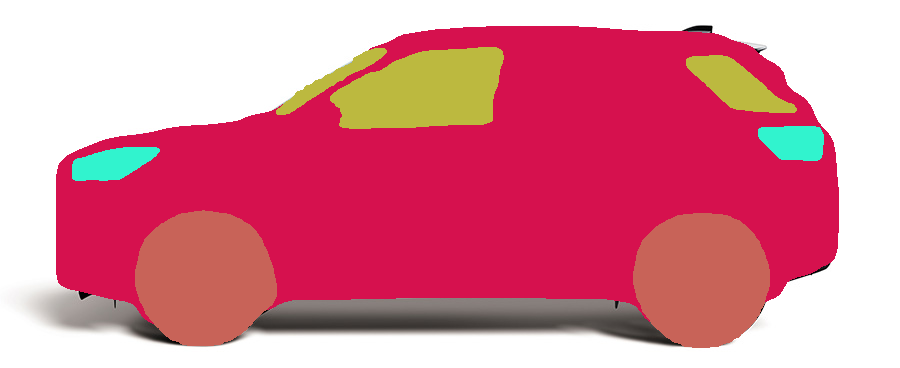

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from random import randint

# Configuration setup (same as before)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Use the path to your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for inference
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # Set this to match your dataset

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Load an image and run inference
image = cv2.imread("/content/extracted_files/Dataset/test/images/003.png")
outputs = predictor(image)

# Extract masks, bounding boxes, and class labels from the output
masks = outputs["instances"].pred_masks.to("cpu").numpy()  # Binary masks
boxes = outputs["instances"].pred_boxes.tensor.to("cpu").numpy()  # Bounding boxes
class_ids = outputs["instances"].pred_classes.to("cpu").numpy()  # Class IDs



# Generate random colors for each class
colors = {}
for class_id in np.unique(class_ids):
    colors[class_id] = (randint(0, 255), randint(0, 255), randint(0, 255))  # Generate a random color

# Draw polygons for each instance
for i in range(masks.shape[0]):
    mask = masks[i]
    class_id = class_ids[i]  # Get the class ID of the instance
    color = colors[class_id]  # Assign a unique color to each class

    # Convert the mask to contours
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contour polygons (outline)
    cv2.polylines(image, contours, isClosed=True, color=color, thickness=2)

    # Or, you can fill the polygon (instance area) with the class-specific color
    cv2.fillPoly(image, contours, color=color)

# Show the image with drawn polygons
cv2_imshow(image)


[10/06 16:28:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

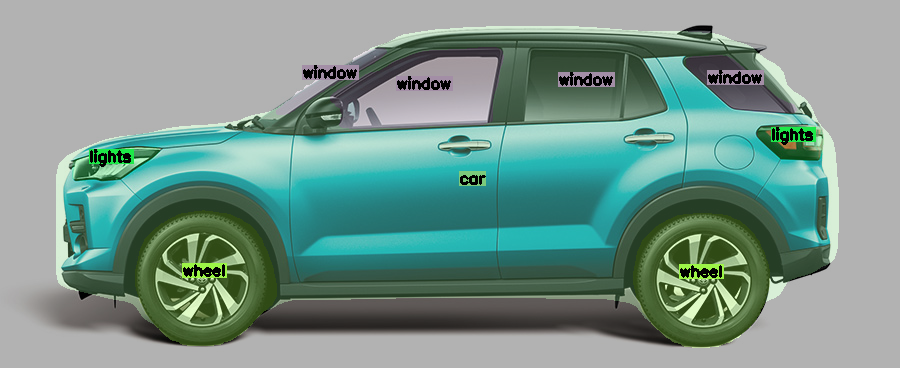

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from random import randint

# Configuration setup (same as before)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Use the path to your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for inference
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # Set this to match your dataset

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Load an image and run inference
image = cv2.imread("/content/extracted_files/Dataset/test/images/003.png")
outputs = predictor(image)

# Extract masks, bounding boxes, and class labels from the output
masks = outputs["instances"].pred_masks.to("cpu").numpy()  # Binary masks
boxes = outputs["instances"].pred_boxes.tensor.to("cpu").numpy()  # Bounding boxes
class_ids = outputs["instances"].pred_classes.to("cpu").numpy()  # Class IDs

# Generate random colors for each class
colors = {}
for class_id in np.unique(class_ids):
    colors[class_id] = (randint(0, 255), randint(0, 255), randint(0, 255))  # Generate a random color

# Create an empty image to draw masks
overlay = np.zeros_like(image)
clsNames=["car","wheel","lights","window"]
# Draw polygons for each instance
for i in range(masks.shape[0]):
    mask = masks[i]
    class_id = class_ids[i]  # Get the class ID of the instance
    color = colors[class_id]  # Assign a unique color to each class

    # Convert the mask to contours
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contour polygons (outline)
    cv2.polylines(overlay, contours, isClosed=True, color=color, thickness=2)

    # Fill the polygon (instance area) with the class-specific color
    cv2.fillPoly(overlay, contours, color=color)


# Blend the original image and the overlay
blended_image = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)
for i in range(masks.shape[0]):
    mask = masks[i]
    class_id = class_ids[i]  # Get the class ID of the instance
    color = colors[class_id]  # Assign a unique color to each class

    # Get the center of the mask to place the class name
    M = cv2.moments(mask.astype(np.uint8))
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Add the class name text at the center of the polygon
        class_name = clsNames[class_id]  # Replace with actual class names if available

        # Get the width and height of the text box
        w, h = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]

        # Draw a filled rectangle behind the text for better visibility
        cv2.rectangle(blended_image, (cX , cY - h), (cX + w, cY), color, -1)  # Filled rectangle

        # Put the text on the blended image
        cv2.putText(blended_image, class_name, (cX , cY - h), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Show the blended image with drawn polygons and class names
cv2_imshow(blended_image)



In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from random import randint

# Configuration setup (same as before)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Use the path to your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a threshold for inference
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # Set this to match your dataset

# Initialize the predictor
predictor = DefaultPredictor(cfg)

# Load an image and run inference
image = cv2.imread("/content/extracted_files/Dataset/test/images/003.png")
outputs = predictor(image)

# Extract masks, bounding boxes, and class labels from the output
masks = outputs["instances"].pred_masks.to("cpu").numpy()  # Binary masks
boxes = outputs["instances"].pred_boxes.tensor.to("cpu").numpy()  # Bounding boxes
class_ids = outputs["instances"].pred_classes.to("cpu").numpy()  # Class IDs

# Generate random colors for each class
colors = {}
for class_id in np.unique(class_ids):
    colors[class_id] = (randint(0, 255), randint(0, 255), randint(0, 255))  # Generate a random color

# Create an empty image to draw masks
overlay = np.zeros_like(image)
clsNames=["car","wheel","lights","window"]
# Draw polygons for each instance
for i in range(masks.shape[0]):
    mask = masks[i]
    class_id = class_ids[i]  # Get the class ID of the instance
    color = colors[class_id]  # Assign a unique color to each class

    # Convert the mask to contours
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contour polygons (outline)
    cv2.polylines(overlay, contours, isClosed=True, color=color, thickness=2)

    # Fill the polygon (instance area) with the class-specific color
    cv2.fillPoly(overlay, contours, color=color)


# Blend the original image and the overlay
blended_image = cv2.addWeighted(image, 0.7, overlay, 0.3, 0)
for i in range(masks.shape[0]):
    mask = masks[i]
    class_id = class_ids[i]  # Get the class ID of the instance
    color = colors[class_id]  # Assign a unique color to each class

    # Get the center of the mask to place the class name
    M = cv2.moments(mask.astype(np.uint8))
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Add the class name text at the center of the polygon
        class_name = clsNames[class_id]  # Replace with actual class names if available

        # Get the width and height of the text box
        w, h = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]

        # Draw a filled rectangle behind the text for better visibility
        cv2.rectangle(blended_image, (cX - w // 2, cY - h - 2), (cX + w // 2, cY), color, -1)  # Filled rectangle

        # Put the text on the blended image
        cv2.putText(blended_image, class_name, (cX - w // 2, cY - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Show the blended image with drawn polygons and class names
cv2_imshow(blended_image)



[10/06 15:04:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

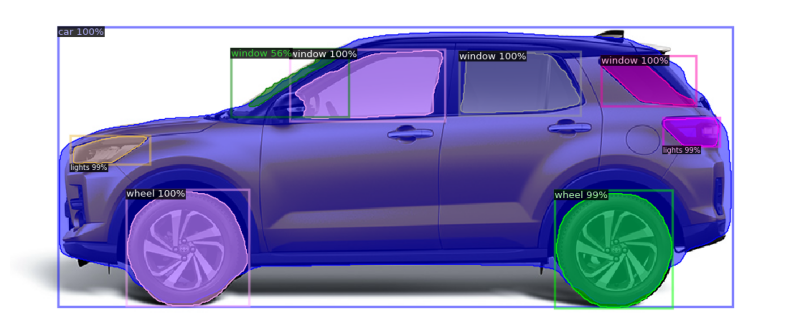

In [ ]:
import cv2
import random
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Set up the configuration for inference
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to your trained model
cfg.MODEL.EVALUATOR = "COCO"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set the threshold for this model
predictor = DefaultPredictor(cfg)

# Load a sample image from the test dataset
test_image_path = "/content/extracted_files/Dataset/test/images/003.png"  # Update with a valid image path
image = cv2.imread(test_image_path)

# Perform inference
outputs = predictor(image)

# Visualize the predictions
metadata = MetadataCatalog.get("train_dataset")
v = Visualizer(image[:, :, ::-1], metadata=metadata, scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(out.get_image()[:, :, ::-1])  # Convert BGR to RGB for matplotlib
plt.axis('off')
plt.show()


In [ ]:
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Load configuration and model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Path to your model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Create predictor
predictor = DefaultPredictor(cfg)

# Export to ONNX
model = predictor.model
dummy_input = torch.randn(1, 3, 800, 800)  # Adjust the size based on your model's input
torch.onnx.export(model, dummy_input, "model.onnx", export_params=True, opset_version=12,
                  do_constant_folding=True, input_names=['input'], output_names=['output'])


[10/06 16:06:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

IndexError: too many indices for tensor of dimension 3